# Internet Advertisements Data Set

### Student: Rodolfo Lerma

## Data Set Information:

This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). Additional information can be found [here](https://archive.ics.uci.edu/ml/datasets/internet%2Badvertisements).

## Attribute Information:

The dataset has 3 continous (height, width, aratio) and 1555 binary (urls, tags, captions) features. 

## Source:

Creator & donor: Nicholas Kushmerick <nick '@' ucd.ie>

# Learning Objectives
- Identify and impute missing data
- Use normalization as part of the modeling process: min max normalization.
- Use normalization as part of the modeling process: centering and scaling.
- Use hold-out validation to compare the performance of a pair of models using a large data set.

In [1]:
import pandas as pd
import numpy as np

# Load the data
internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',', error_bad_lines=False)
print(internetAd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to Target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


C:\Users\rodol\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
internetAd.head(20)

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [3]:
internetAd.shape

(3279, 1559)

In [4]:
internetAd.dtypes

height                object
width                 object
aratio                object
local                 object
url*images+buttons     int64
                       ...  
caption*here           int64
caption*click          int64
caption*for            int64
caption*you            int64
Target                object
Length: 1559, dtype: object

The dataset contains 1559 features/columns and 3279 rows/observations. It is possible to see that there is some missing data in the form of a question mark string `" ?"`

### Question 1.1: Replace all the values of '   ?' with nan. And replace ad. with 1 and nonad. with 0

In [5]:
import numpy as np

#Replace "?" values for nan
options = ["?"," ?" ," ? ","   ?", "     ?", "      ?","       ?","     ?  ","     ?   "]
for i in options:
    internetAd.replace(i, np.nan, inplace=True)

In [6]:
#Convert values to numeric
sample_columns = ['height', 'width', 'aratio', 'local']
for i in sample_columns:
    internetAd[i] = pd.to_numeric(internetAd[i]) 

In [7]:
#Replacing ad. and nonad.
internetAd.replace(to_replace = ['ad.','nonad.'], value = [1,0], inplace = True)

### Question 1.1 Part 2: Check that replacing worked

In [8]:
#Checking if the values were in fact replace
internetAd.head(15)

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,59.0,460.0,7.7966,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,60.0,234.0,3.9000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We can see that the replacement worked for both the missing data and the `Target` column.

### Make Sure that "height","width","aratio" is type - float

In [9]:
internetAd.dtypes.head(10)

height                float64
width                 float64
aratio                float64
local                 float64
url*images+buttons      int64
url*likesbooks.com      int64
url*www.slake.com       int64
url*hydrogeologist      int64
url*oso                 int64
url*media               int64
dtype: object

In [10]:
internetAd.dtypes.tail(10)

caption*home     int64
caption*my       int64
caption*your     int64
caption*in       int64
caption*bytes    int64
caption*here     int64
caption*click    int64
caption*for      int64
caption*you      int64
Target           int64
dtype: object

It is possible to see that the columns that initially had the string value "?" now are *float64* datatype, which indicates that we do not have strings anymore.

### Question 1.2: Describe the statistics for each of the columns ["height","width","aratio","local"] 

In [11]:
internetAd[sample_columns].describe()

,height,width,aratio,local
count,2376.000000,2378.000000,2369.000000,3264.000000
mean,64.021886,155.344828,3.911953,0.767157
std,54.868604,130.032350,6.042986,0.422708
min,1.000000,1.000000,0.001500,0.000000
25%,25.000000,80.000000,1.035700,1.000000
50%,51.000000,110.000000,2.102000,1.000000
75%,85.250000,184.000000,5.333300,1.000000
max,640.000000,640.000000,60.000000,1.000000


### Question 2.1: Caluclate and display the (mean, median, mode) for each of the columns ["height","width","aratio","local"] as well as the overall statistics using describe method.

In [12]:
#Mean, Median & Mode
import statistics as st

mean_list = []
median_list = []
mode_list = []

for i in sample_columns:
    mean = np.mean(internetAd[i])
    median = internetAd[i].median()
    mode = st.mode(internetAd[i])
    mean_list.append(mean)
    median_list.append(median)
    mode_list.append(mode)
    
mean_dic = {sample_columns[i]: mean_list[i] for i in range(len(mean_list))}
median_dic = {sample_columns[i]: median_list[i] for i in range(len(median_list))}
mode_dic = {sample_columns[i]: mode_list[i] for i in range(len(mode_list))}

df_summary = [mean_dic,median_dic,mode_dic]
columns_summary = ['mean','median','mode']
df_summary = pd.DataFrame(df_summary)
stats_summary = df_summary.T
stats_summary.columns = columns_summary
stats_summary

,mean,median,mode
height,64.021886,51.000,60.0
width,155.344828,110.000,468.0
aratio,3.911953,2.102,1.0
local,0.767157,1.000,1.0


### Question 2.2: Replace nan values for each of the ["height","width","aratio","local"] with the respective median value

In [13]:
for i in sample_columns:
    internetAd[i].fillna(internetAd[i].median(), inplace=True)

### Question 3.1: Plot the distribution of each of ["height","width","aratio","local"]

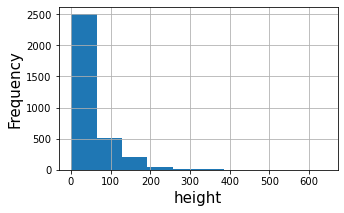

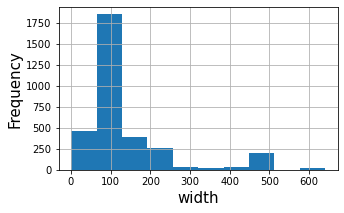

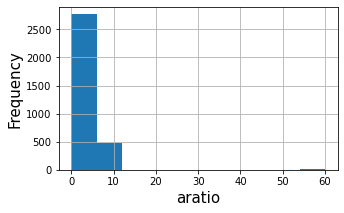

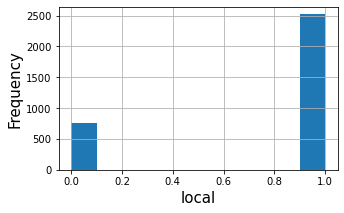

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def hist_plot(df,a):
    df[a].hist(figsize = (5,3))
    plt.xlabel(a, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.show()

for i in sample_columns:
    hist_plot(internetAd, i)

### Question 3.2: You have noticed the wide variation across the different features. As a result, let's normalize the features using [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method. Before we do that, we need to split the data into training and testing.

In [15]:
from sklearn.model_selection import train_test_split

#Splitting the dataset
columns_no_target = internetAd.columns.to_list()
columns_no_target.remove('Target')
X = internetAd[columns_no_target]
y = internetAd['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler

#Minmax normalization
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_minmax_scaled = scaler.transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

### Question 3.3: Lets build another training set where features are normalized using [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [17]:
from sklearn.preprocessing import StandardScaler

#StdScalar normalization
sscaler = StandardScaler()
sscaler.fit(X_train)

X_train_std_scaled = sscaler.transform(X_train)
X_test_std_scaled = sscaler.transform(X_test)

### Question 4.1: Apply [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the above minmax scaled dataset with class_weight='balanced', solver='saga', and max_iter=1000. Calculate Accuracy, Confusion Matrix, Precision, and Recall.


In [18]:
from sklearn.linear_model import LogisticRegression

log_reg_sk_l2 = LogisticRegression(class_weight = 'balanced',
                                solver = 'saga', 
                                max_iter = 1000)
log_reg_sk_l2.fit(X_train_minmax_scaled, y_train)
y_predicted_l2 = log_reg_sk_l2.predict(X_test_minmax_scaled)

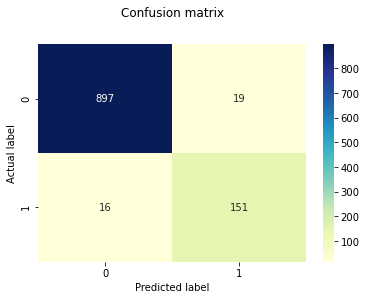

In [19]:
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

#Confusion matrix
cm_l2 = confusion_matrix(y_test, y_predicted_l2)

def confusion_matrix_plot(cm):
    fig, ax = plt.subplots()
    class_names=[1,0] # name of classes
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

confusion_matrix_plot(cm_l2)

In [20]:
print(classification_report(y_test, y_predicted_l2, digits=3))

accuracy_l2 = accuracy_score(y_test, y_predicted_l2)
recall_l2 = recall_score(y_test, y_predicted_l2)
precision_l2 = precision_score(y_test, y_predicted_l2)

              precision    recall  f1-score   support

           0      0.982     0.979     0.981       916
           1      0.888     0.904     0.896       167

    accuracy                          0.968      1083
   macro avg      0.935     0.942     0.939      1083
weighted avg      0.968     0.968     0.968      1083



### Question 4.2: Repeat question 4.1 setting penalty to {‘l1’,'l2', ‘elasticnet’}. 
- Set C=0.1 for l1.
- Set l1_ratio=0.5 for elasticnet.

**The l2 is the default choice**

              precision    recall  f1-score   support

           0      0.964     0.963     0.963       916
           1      0.798     0.802     0.800       167

    accuracy                          0.938      1083
   macro avg      0.881     0.883     0.882      1083
weighted avg      0.938     0.938     0.938      1083



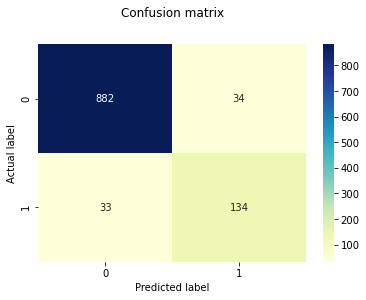

In [21]:
#penalty='l1'
log_reg_sk_l1 = LogisticRegression(penalty = 'l1',
                                C = 0.1,
                                class_weight = 'balanced',
                                solver = 'saga', 
                                max_iter = 1000)
log_reg_sk_l1.fit(X_train_minmax_scaled, y_train)
y_predicted_l1 = log_reg_sk_l1.predict(X_test_minmax_scaled)

cm_l1 = confusion_matrix(y_test, y_predicted_l1)
confusion_matrix_plot(cm_l1)

print(classification_report(y_test, y_predicted_l1, digits=3))
accuracy_l1 = accuracy_score(y_test, y_predicted_l1)
recall_l1 = recall_score(y_test, y_predicted_l1)
precision_l1 = precision_score(y_test, y_predicted_l1)

              precision    recall  f1-score   support

           0      0.983     0.975     0.979       916
           1      0.869     0.910     0.889       167

    accuracy                          0.965      1083
   macro avg      0.926     0.943     0.934      1083
weighted avg      0.966     0.965     0.965      1083



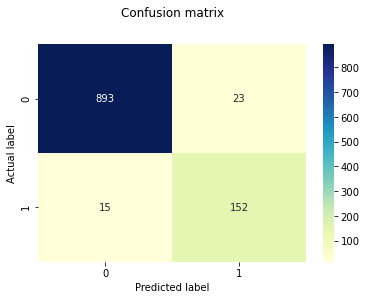

In [22]:
#penalty='elasticnet'
log_reg_sk_e = LogisticRegression(penalty = 'elasticnet',
                                  class_weight = 'balanced',
                                  solver = 'saga', 
                                  max_iter = 1000,
                                  l1_ratio = 0.5)
log_reg_sk_e.fit(X_train_minmax_scaled, y_train)
y_predicted_e = log_reg_sk_e.predict(X_test_minmax_scaled)

cm_e = confusion_matrix(y_test, y_predicted_e)
confusion_matrix_plot(cm_e)

print(classification_report(y_test, y_predicted_e, digits=3))
accuracy_e = accuracy_score(y_test, y_predicted_e)
recall_e = recall_score(y_test, y_predicted_e)
precision_e = precision_score(y_test, y_predicted_e)

In [23]:
performance = ['accuracy', 'recall', 'precision']
values_l2 = [accuracy_l2, recall_l2, precision_l2]
values_l1 = [accuracy_l1, recall_l1, precision_l1]
values_e = [accuracy_e, recall_e, precision_e]

l2_dic = {performance[i]: values_l2[i] for i in range(len(values_l2))}
l1_dic = {performance[i]: values_l1[i] for i in range(len(values_l1))}
e_dic = {performance[i]: values_e[i] for i in range(len(values_e))}

df_1 = [l2_dic,l1_dic,e_dic]
columns_1 = ['l2_minmax','l1_minmax','e_minmax']
df_1 = pd.DataFrame(df_1)
comparison_1 = df_1.T
comparison_1.columns = columns_1
comparison_1

,l2_minmax,l1_minmax,e_minmax
accuracy,0.967682,0.938135,0.964912
recall,0.904192,0.802395,0.910180
precision,0.888235,0.797619,0.868571


<Figure size 432x288 with 0 Axes>

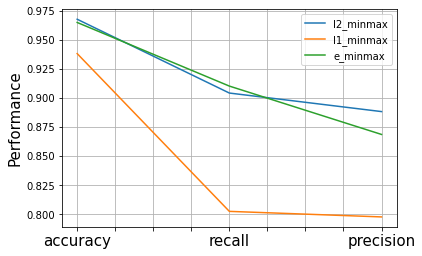

In [24]:
plt.figure() 
comparison_1.plot()
plt.ylabel('Performance',fontsize = 15)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=10)
plt.grid(True)
plt.legend(loc='best')
plt.show()

### Question 5: How do the three models compare? How did you make the comparison?

From the table and plot above it is possible to see that the model using `l2` performs slighly better that the model using `elasticnet` as the regularization method. But both `l2` & `elasticnet` performed better than the model using `l1` regularization.

The comparison was done using hold out data (test data), using the same training data set for the 3 models and the same testing data to determine the performance.

### Question 6: Repeat steps 4.1-4.3 with the standard scaled dataset

              precision    recall  f1-score   support

           0      0.982     0.969     0.976       916
           1      0.844     0.904     0.873       167

    accuracy                          0.959      1083
   macro avg      0.913     0.937     0.924      1083
weighted avg      0.961     0.959     0.960      1083



C:\Users\rodol\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


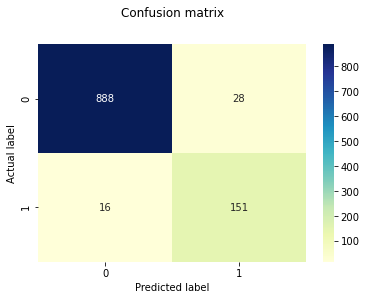

In [25]:
#l2
log_reg_sk_std_l2 = LogisticRegression(class_weight = 'balanced',
                                       solver = 'saga', 
                                       max_iter = 1000)
log_reg_sk_std_l2.fit(X_train_std_scaled, y_train)
y_predicted_std_l2 = log_reg_sk_std_l2.predict(X_test_std_scaled)

cm_std_l2 = confusion_matrix(y_test, y_predicted_std_l2)
confusion_matrix_plot(cm_std_l2)

print(classification_report(y_test, y_predicted_std_l2, digits=3))
accuracy_std_l2 = accuracy_score(y_test, y_predicted_std_l2)
recall_std_l2 = recall_score(y_test, y_predicted_std_l2)
precision_std_l2 = precision_score(y_test, y_predicted_std_l2)

              precision    recall  f1-score   support

           0      0.985     0.972     0.978       916
           1      0.855     0.916     0.884       167

    accuracy                          0.963      1083
   macro avg      0.920     0.944     0.931      1083
weighted avg      0.965     0.963     0.964      1083



C:\Users\rodol\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


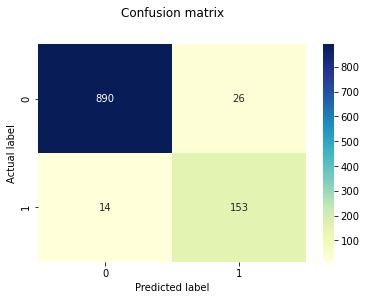

In [26]:
#l1
#penalty='l1'
log_reg_sk_std_l1 = LogisticRegression(penalty = 'l1',
                                C = 0.1,
                                class_weight = 'balanced',
                                solver = 'saga', 
                                max_iter = 1000)
log_reg_sk_std_l1.fit(X_train_std_scaled, y_train)
y_predicted_std_l1 = log_reg_sk_std_l1.predict(X_test_std_scaled)

cm_std_l1 = confusion_matrix(y_test, y_predicted_std_l1)
confusion_matrix_plot(cm_std_l1)

print(classification_report(y_test, y_predicted_std_l1, digits=3))
accuracy_std_l1 = accuracy_score(y_test, y_predicted_std_l1)
recall_std_l1 = recall_score(y_test, y_predicted_std_l1)
precision_std_l1 = precision_score(y_test, y_predicted_std_l1)

              precision    recall  f1-score   support

           0      0.982     0.966     0.974       916
           1      0.830     0.904     0.865       167

    accuracy                          0.957      1083
   macro avg      0.906     0.935     0.920      1083
weighted avg      0.959     0.957     0.957      1083



C:\Users\rodol\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


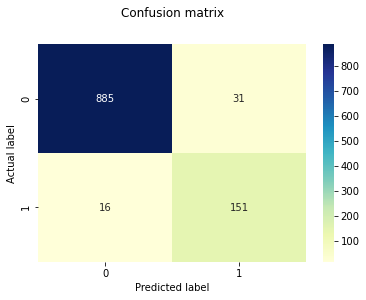

In [27]:
#elasticnet
log_reg_sk_std_e = LogisticRegression(penalty = 'elasticnet',
                                  class_weight = 'balanced',
                                  solver = 'saga', 
                                  max_iter = 1000,
                                  l1_ratio = 0.5)
log_reg_sk_std_e.fit(X_train_std_scaled, y_train)
y_predicted_std_e = log_reg_sk_std_e.predict(X_test_std_scaled)

cm_std_e = confusion_matrix(y_test, y_predicted_std_e)
confusion_matrix_plot(cm_std_e)

print(classification_report(y_test, y_predicted_std_e, digits=3))
accuracy_std_e = accuracy_score(y_test, y_predicted_std_e)
recall_std_e = recall_score(y_test, y_predicted_std_e)
precision_std_e = precision_score(y_test, y_predicted_std_e)

In [28]:
#Summary on performance
performance = ['accuracy', 'recall', 'precision']
values_l2 = [accuracy_l2, recall_l2, precision_l2]
values_l1 = [accuracy_l1, recall_l1, precision_l1]
values_e = [accuracy_e, recall_e, precision_e]
values_std_l2 = [accuracy_std_l2, recall_std_l2, precision_std_l2]
values_std_l1 = [accuracy_std_l1, recall_std_l1, precision_std_l1]
values_std_e = [accuracy_std_e, recall_std_e, precision_std_e]

l2_dic = {performance[i]: values_l2[i] for i in range(len(values_l2))}
l1_dic = {performance[i]: values_l1[i] for i in range(len(values_l1))}
e_dic = {performance[i]: values_e[i] for i in range(len(values_e))}
l2_std_dic = {performance[i]: values_std_l2[i] for i in range(len(values_std_l2))}
l1_std_dic = {performance[i]: values_std_l1[i] for i in range(len(values_std_l1))}
e_std_dic = {performance[i]: values_std_e[i] for i in range(len(values_std_e))}

df = [l2_dic,l1_dic,e_dic,l2_std_dic,l1_std_dic,e_std_dic]
columns = ['l2_minmax','l1_minmax','e_minmax','l2_std','l1_std','e_std']
df = pd.DataFrame(df)
comparison = df.T
comparison.columns = columns
comparison

,l2_minmax,l1_minmax,e_minmax,l2_std,l1_std,e_std
accuracy,0.967682,0.938135,0.964912,0.959372,0.963066,0.956602
recall,0.904192,0.802395,0.910180,0.904192,0.916168,0.904192
precision,0.888235,0.797619,0.868571,0.843575,0.854749,0.829670


<Figure size 432x288 with 0 Axes>

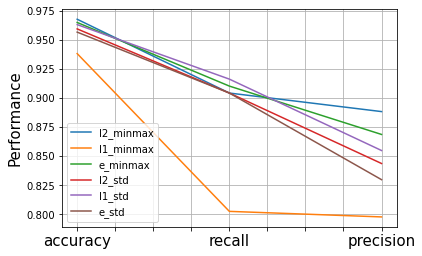

In [29]:
plt.figure() 
comparison.plot()
plt.ylabel('Performance',fontsize = 15)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=10)
plt.grid(True)
plt.legend(loc='best')
plt.show()